In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Training Dataset Preprocessing**

In [ ]:
#read file
train_df = pd.read_csv("/content/drive/MyDrive/SocialMedia_Datathon_2025/SMU_Train_Swapped.csv")

Swapping Age and Gender

In [ ]:
age_is_not_numeric = pd.to_numeric(train_df['Age'], errors='coerce').isnull()
gender_is_numeric = pd.to_numeric(train_df['Gender'], errors='coerce').notnull()
swapped_rows = train_df[age_is_not_numeric & gender_is_numeric]

if not swapped_rows.empty:
      # Swap Age and Gender values in the identified rows
      temp_age = swapped_rows['Age'].copy()
      train_df.loc[swapped_rows.index, 'Age'] = swapped_rows['Gender']
      train_df.loc[swapped_rows.index, 'Gender'] = temp_age

In [ ]:
train_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


Brief information about the data

In [ ]:
print("Information about the training data:")
train_df.info()


print("\nSummary statistics of the training data:")
train_df.describe()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB

Summary statistics of the training data:


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


Missing Values

In [ ]:
print(train_df.isnull().sum())

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64


In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df['Age'] = train_df['Age'].astype(int)

Check Duplicate Values

In [ ]:
print("Duplicate Rows:", train_df.duplicated().sum())

Duplicate Rows: 0


**Test Data Preprocessing**

In [ ]:
test_df = pd.read_excel("/content/drive/MyDrive/SocialMedia_Datathon_2025/SocialMediaUsage-Test.xlsm")

Removing empty rows

In [ ]:
test_df = test_df.dropna(how='all').reset_index(drop=True)
test_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500.0,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
1,488.0,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
2,776.0,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
3,869.0,27,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
4,573.0,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184.0,22,Male,Twitter,70.0,1.0,20.0,5.0,22.0,Neutral
99,896.0,33,Male,LinkedIn,85.0,4.0,35.0,18.0,18.0,Boredom
100,708.0,24,Non-binary,Facebook,110.0,6.0,35.0,23.0,25.0,Sadness
101,993.0,24,Male,Telegram,75.0,3.0,37.0,16.0,22.0,Neutral


Missing Values

In [ ]:
print(test_df.isnull().sum())

User_ID                       0
Age                           1
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
test_df['Age'] = test_df['Age'].astype(int)

**EDA - Exploratory Data Analysis(Training Dataset**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

Age distribution histogram plot to find out the Social Media Usage by age group  

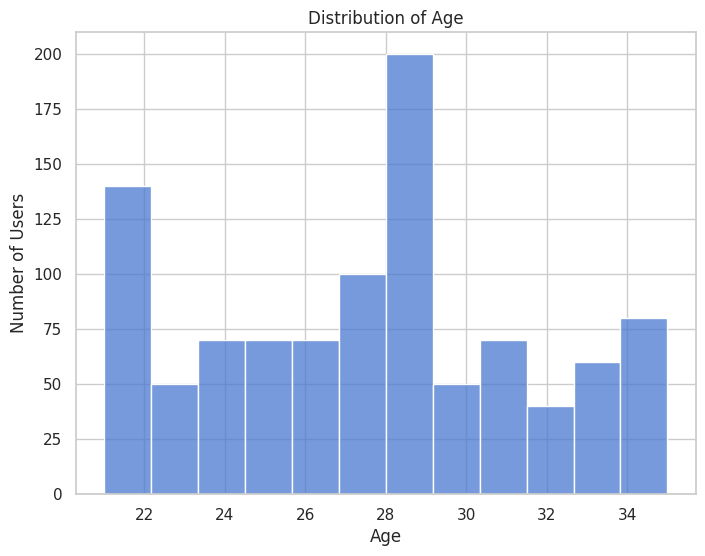

In [ ]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'])  # kde=True for a smooth curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Pie Chart to find out the Social Media Usage by different genders

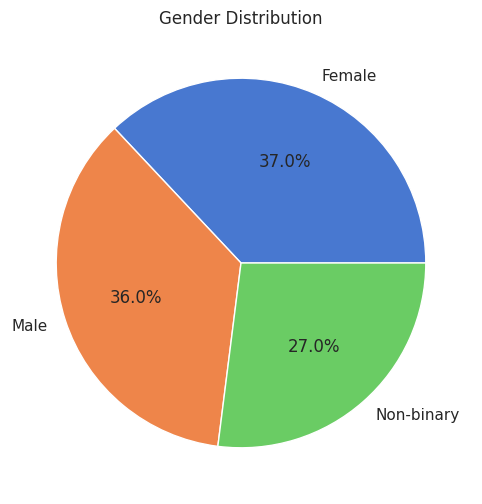

In [ ]:
# Gender distribution
gender_counts = train_df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

To find the most used platform

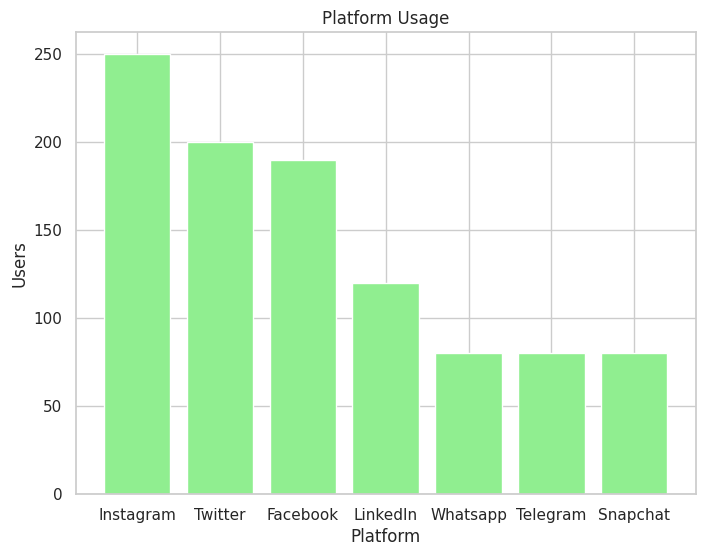

In [ ]:
# Usage of different platforms
platform_counts = train_df['Platform'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(platform_counts.index, platform_counts.values, color=['lightgreen'])
plt.title('Platform Usage')
plt.xlabel('Platforms')
plt.ylabel('Users')
plt.show()

To find the emotion percentage

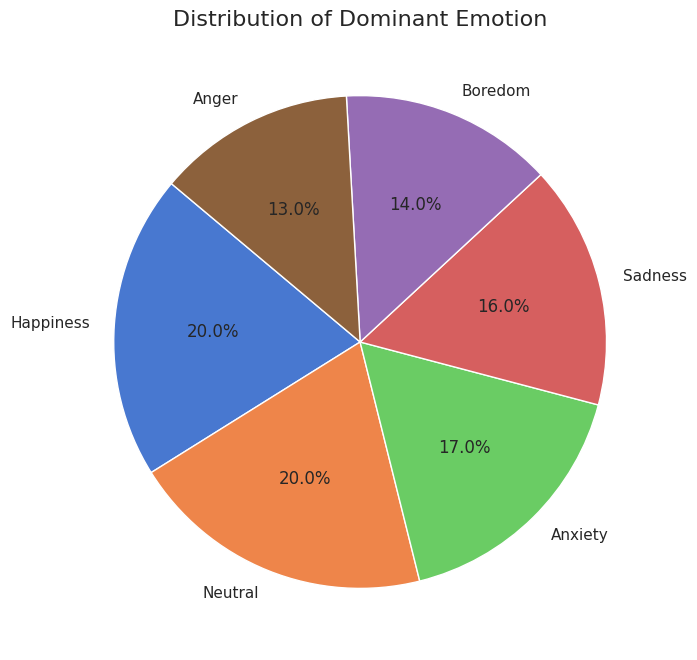

In [ ]:
emotion_counts = train_df['Dominant_Emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotion', fontsize=16)
plt.show()

To check which gender uses which social media platform

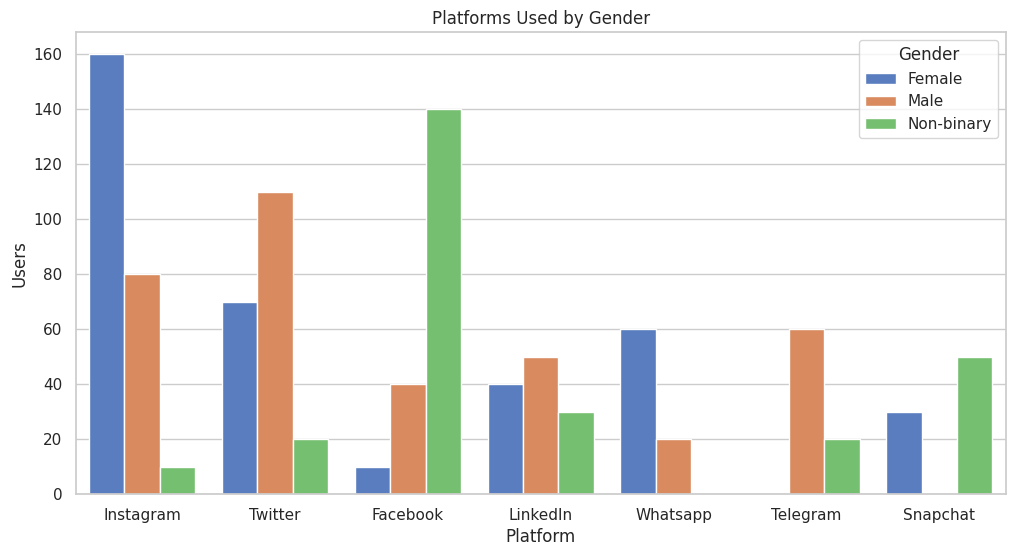

In [ ]:
#Platforms Used by Gender:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Gender', data=train_df)
plt.title('Platforms Used by Gender')
plt.ylabel('Users')
plt.show()

In [ ]:
# Age Data Analysis:
print("Age Data Analysis:")
print(f"Minimum Age: {train_df['Age'].min()}")
print(f"Maximum Age: {train_df['Age'].max()}")
print(f"Distinct Age Values: {train_df['Age'].unique()}")
print(f"Number of Distinct Age Values: {len(train_df['Age'].unique())}")

Age Data Analysis:
Minimum Age: 21
Maximum Age: 35
Distinct Age Values: [25 30 22 28 33 21 27 24 29 31 23 26 34 35 32]
Number of Distinct Age Values: 15


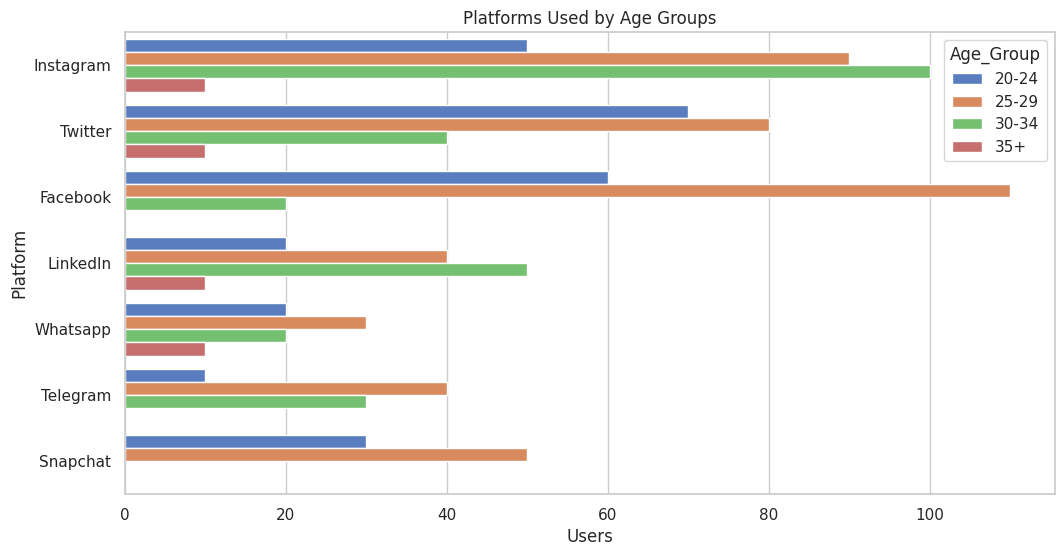

In [ ]:
# Age groups based on the provided results
bins = [20, 25, 30, 35, 36]
labels = ['20-24', '25-29', '30-34', '35+']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Platforms Used by Age Groups:
plt.figure(figsize=(12, 6))
sns.countplot(y='Platform', hue='Age_Group', data=train_df)
plt.title('Platforms Used by Age Groups')
plt.xlabel('Users')
plt.show()

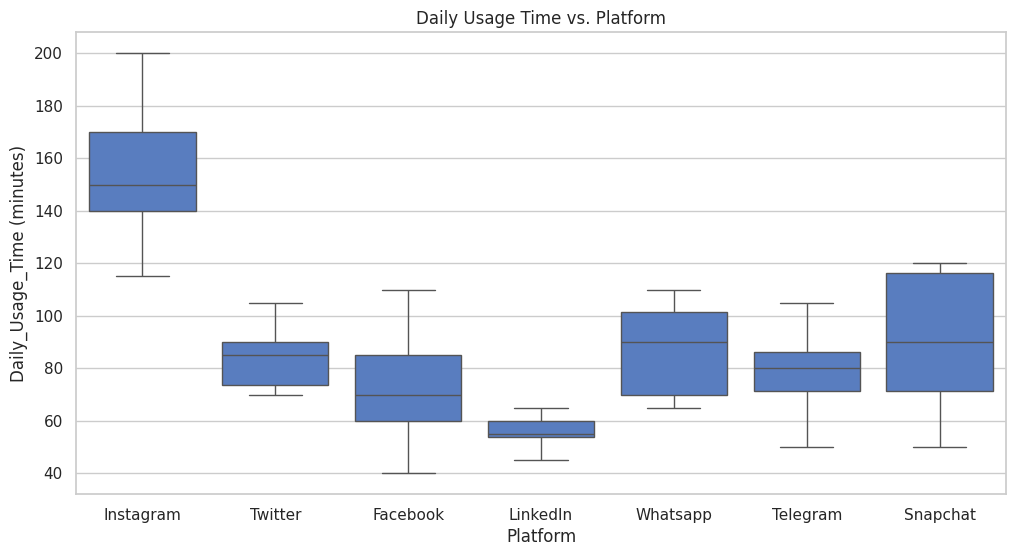

In [ ]:
#Daily Usage Time vs. Platform:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df)
plt.title('Daily Usage Time vs. Platform')
plt.show()

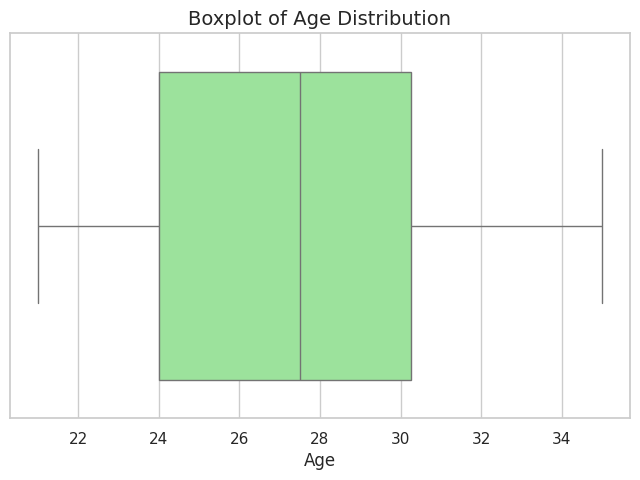

In [ ]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

#Boxplot for Age Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df['Age'], color='lightgreen')

plt.title("Boxplot of Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)

plt.show()

ENCODING CATEGORICAL COLUMNS (TRAINING)




In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     1000 non-null   object  
 1   Age                         1000 non-null   int64   
 2   Gender                      1000 non-null   object  
 3   Platform                    1000 non-null   object  
 4   Daily_Usage_Time (minutes)  1000 non-null   float64 
 5   Posts_Per_Day               1000 non-null   float64 
 6   Likes_Received_Per_Day      1000 non-null   float64 
 7   Comments_Received_Per_Day   1000 non-null   float64 
 8   Messages_Sent_Per_Day       1000 non-null   float64 
 9   Dominant_Emotion            1000 non-null   object  
 10  Age_Group                   1000 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 87.1+ KB


In [ ]:
numerical_cols = ['Age','Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day','Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

In [ ]:
categorical_cols = ['Gender', 'Platform', 'Dominant_Emotion']

LabelEncoder (Training)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(train_df, categorical_cols, numerical_cols):

    # Label encode categorical columns
    encoded_dfs = []
    for col in categorical_cols:
        encoder = LabelEncoder()
        encoded_col = encoder.fit_transform(train_df[col])
        encoded_dfs.append(pd.Series(encoded_col, name=col))

    # Combine encoded categorical columns with numerical columns
    final_df = pd.concat([train_df[numerical_cols]] + encoded_dfs, axis=1)

    return final_df


categorical_cols = ['Gender', 'Platform', 'Dominant_Emotion']
numerical_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

final_df = preprocess_data(train_df, categorical_cols, numerical_cols)
print(final_df.head())

    Age  Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
0  25.0                       120.0            3.0                    45.0   
1  30.0                        90.0            5.0                    20.0   
2  22.0                        60.0            2.0                    15.0   
3  28.0                       200.0            8.0                   100.0   
4  33.0                        45.0            1.0                     5.0   

   Comments_Received_Per_Day  Messages_Sent_Per_Day  Gender  Platform  \
0                       10.0                   12.0     0.0       1.0   
1                       25.0                   30.0     1.0       5.0   
2                        5.0                   20.0     2.0       0.0   
3                       30.0                   50.0     0.0       1.0   
4                        2.0                   10.0     1.0       2.0   

   Dominant_Emotion  
0               3.0  
1               0.0  
2               4.0  
3   

In [ ]:
final_df.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender,Platform,Dominant_Emotion
0,25.0,120.0,3.0,45.0,10.0,12.0,0.0,1.0,3.0
1,30.0,90.0,5.0,20.0,25.0,30.0,1.0,5.0,0.0
2,22.0,60.0,2.0,15.0,5.0,20.0,2.0,0.0,4.0
3,28.0,200.0,8.0,100.0,30.0,50.0,0.0,1.0,1.0
4,33.0,45.0,1.0,5.0,2.0,10.0,1.0,2.0,2.0


OUTLIERS

In [ ]:
#Ensures Age is Numeric
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

In [ ]:
#Ensures Age is Numeric
final_df['Age'] = pd.to_numeric(final_df['Age'], errors='coerce')

Plot histogram and box plot to find Skewness and Outliers in Numerical Values



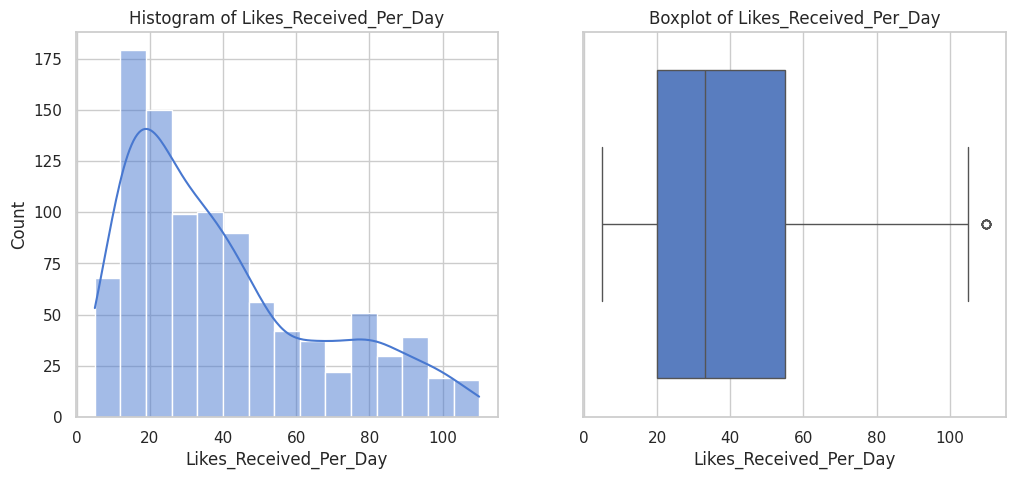

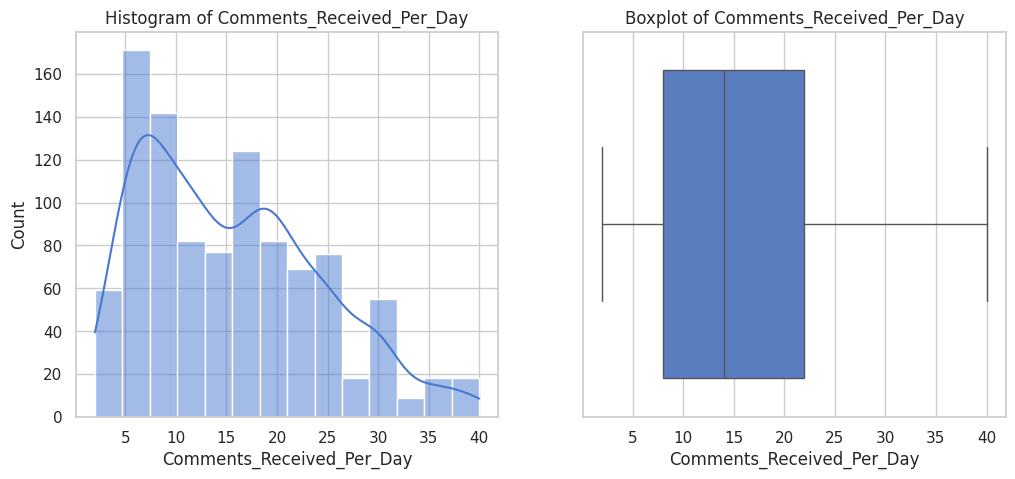

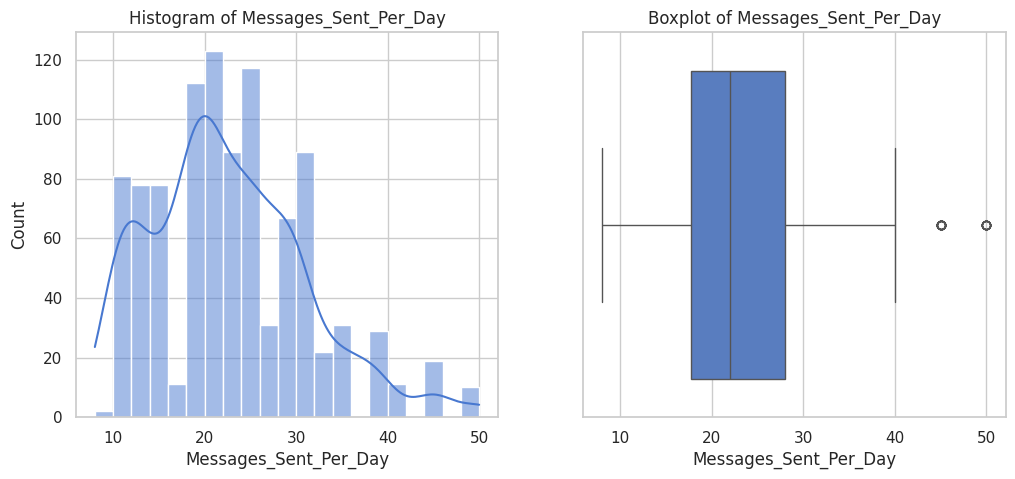

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_distributions(df, columns):
    """
    Visualizes the distributions of specified columns using histograms and boxplots.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to visualize.
    """

    for col in columns:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

columns_to_visualize = ['Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

visualize_distributions(final_df.copy(), columns_to_visualize) #use .copy() to prevent modifying the original dataframe.

In [ ]:
final_df.dropna(inplace=True)
final_df.isnull().sum()

,0
Age,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Gender,0
Platform,0
Dominant_Emotion,0


Robust Scalar - Scales test data using train data stats to reduce outlier impact

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

def scale_test(train_df, test_df, columns_to_scale):

    for col in columns_to_scale:
        if col in train_df.columns and col in test_df.columns:
            scaler = RobustScaler()
            scaler.fit(train_df[[col]])  # Fit on train data
            test_df[col] = scaler.transform(test_df[[col]])  # Transform test_df

    return test_df


columns_to_scale = ['Age', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Daily_Usage_Time (minutes)', 'Messages_Sent_Per_Day']


scaled_test_df = scale_test(train_df, final_df, columns_to_scale)

scaled_test_df.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender,Platform,Dominant_Emotion
0,-0.40,0.636364,3.0,0.342857,-0.285714,-0.975610,0.0,1.0,3.0
1,0.40,0.090909,5.0,-0.371429,0.785714,0.780488,1.0,5.0,0.0
2,-0.88,-0.454545,2.0,-0.514286,-0.642857,-0.195122,2.0,0.0,4.0
3,0.08,2.090909,8.0,1.914286,1.142857,2.731707,0.0,1.0,1.0
4,0.88,-0.727273,1.0,-0.800000,-0.857143,-1.170732,1.0,2.0,2.0


CORRELATION BETWEEN FEATURES

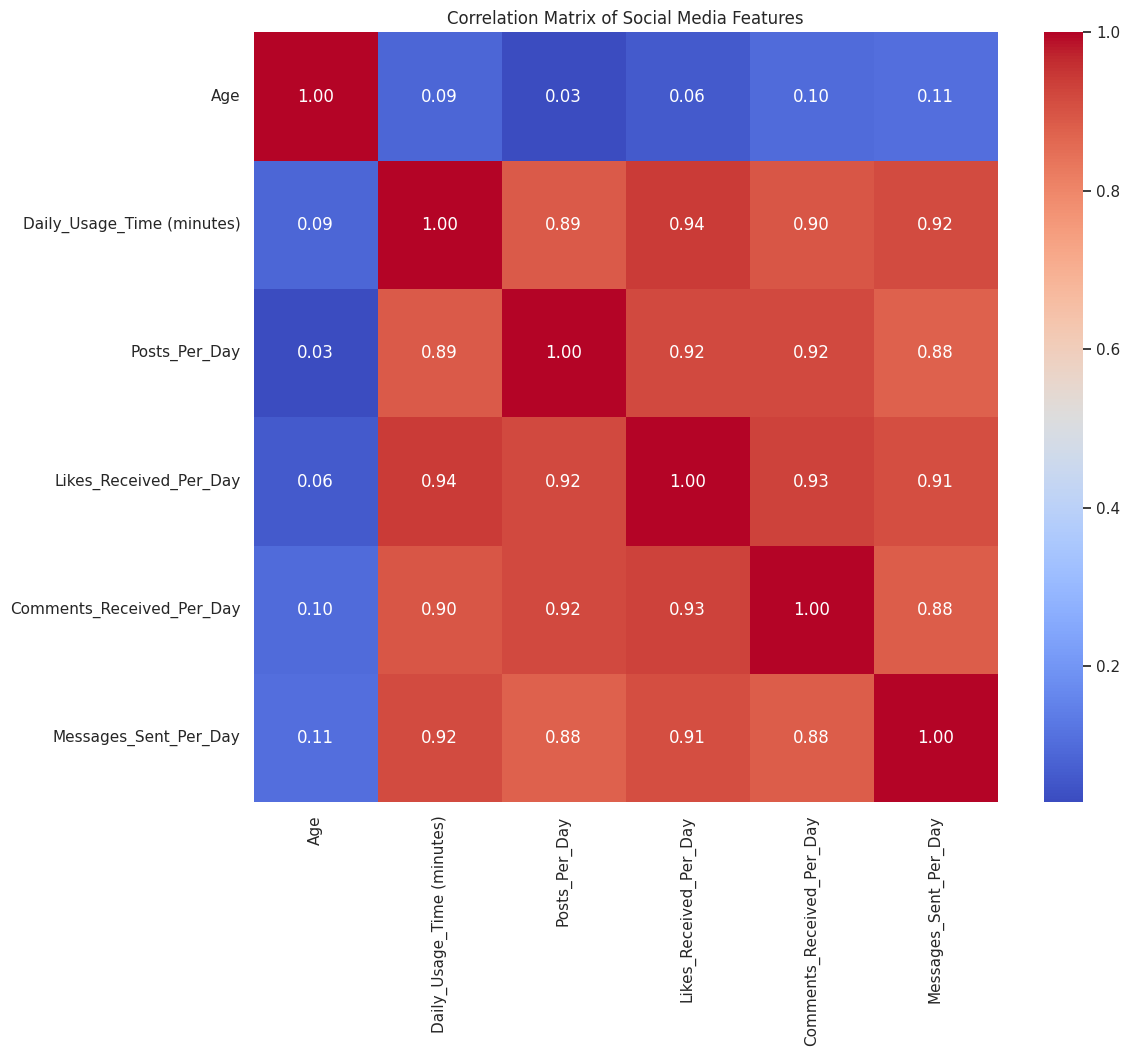

In [ ]:
cor_cols = ['Age','Daily_Usage_Time (minutes)','Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']
# Create correlation matrix
correlation_matrix = df_final[cor_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Social Media Features')
plt.show()


In [ ]:
scaled_test_df.dropna(inplace=True)

**Feature Engineering**

In [ ]:
#Apply PCA for dimentionality reduction
from sklearn.decomposition import PCA

engagement_cols = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

pca = PCA(n_components=1)

# Apply PCA to the engagement columns
pca_result = pca.fit_transform(scaled_test_df[engagement_cols])

# Add the PCA result as a new 'user_engagement' column
scaled_test_df['user_engagement'] = pca_result
scaled_test_df.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender,Platform,Dominant_Emotion,user_engagement
0,-0.40,0.636364,3.0,0.342857,-0.285714,-0.975610,0.0,1.0,3.0,-0.530174
1,0.40,0.090909,5.0,-0.371429,0.785714,0.780488,1.0,5.0,0.0,1.562585
2,-0.88,-0.454545,2.0,-0.514286,-0.642857,-0.195122,2.0,0.0,4.0,-1.744932
3,0.08,2.090909,8.0,1.914286,1.142857,2.731707,0.0,1.0,1.0,5.983821
4,0.88,-0.727273,1.0,-0.800000,-0.857143,-1.170732,1.0,2.0,2.0,-3.092282


In [ ]:
scaled_test_df.drop(columns=['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day'],inplace=True)
scaled_test_df.head()

,Age,Gender,Platform,Dominant_Emotion,user_engagement
0,-0.40,0.0,1.0,3.0,-0.530174
1,0.40,1.0,5.0,0.0,1.562585
2,-0.88,2.0,0.0,4.0,-1.744932
3,0.08,0.0,1.0,1.0,5.983821
4,0.88,1.0,2.0,2.0,-3.092282


Create New Feature

In [ ]:
# Get min, max, and distinct values of the Engagement Score
min_engagement = final_df['user_engagement'].min()
max_engagement =final_df['user_engagement'].max()
distinct_engagement = final_df['user_engagement'].nunique()

# Print the results
print(f"Minimum Engagement Score: {min_engagement}")
print(f"Maximum Engagement Score: {max_engagement}")
print(f"Number of Distinct Engagement Scores: {distinct_engagement}")

Minimum Engagement Score: -3.1185278071981997
Maximum Engagement Score: 6.092688055733094
Number of Distinct Engagement Scores: 200


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
# Save the DataFrame to a CSV file
scaled_test_df.to_csv('/content/drive/MyDrive/SocialMedia_Datathon_2025/final_test.csv', index=False)  # 'output.csv' is the desired filename

In [ ]:
#dropping columns
df_final.drop(columns=['Daily_Usage_Time (minutes)','Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day'],inplace=True)
df_final.head()

,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Anger,Dominant_Emotion_Anxiety,Dominant_Emotion_Boredom,Dominant_Emotion_Happiness,Dominant_Emotion_Neutral,Dominant_Emotion_Sadness,Age,User_Engagement
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,27.0,1.252114
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,21.0,0.650498
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,28.0,1.150248
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,27.0,1.247117
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,21.0,1.080720


In [ ]:
# Save the DataFrame to a CSV file
scaled_df.to_csv('/content/drive/MyDrive/SocialMedia_Datathon_2025/testing_cleaned.csv', index=False)  # 'output.csv' is the desired filename